# Analysis and Comparison Samples

This Notebook will lead you through exercises to help you compare your results to larger samples of exoplanets, and to place them in the context of the 'bigger picture'.

**The tools described below are intended to provide you with ideas and ways in which to analyse your data. You therefore should not feel the need to use all statistical tests and tools described if they do not apply to the analysis that you had in mind.**

In this notebook, you will:

$\bullet$ Take into account selection effects when analysing sample properties

$\bullet$ Analyse and model any underlying trends in your data set, and learn to quantify how well model represents the data

$\bullet$ Identify outliers in you sample distribution

$\bullet$ Learn to quantify the significance of any apparent correlations between paramaters of interest

$\bullet$ Learn to make statistical comparisons between the properties of your source and other exoplanet populations

## Parameter distributions and correlations
Once you have measured parameters for your target, an obvious question to ask will be how this compares to other exoplanets, and what you have learned from this single object. Any such analysis should

$\bullet$ be carried out using statistical tools to be able to quantify the relation between your object and other samples of exoplanets

$\bullet$ consider the effects of error bars, and incorporate these uncertainties in any statistical comparison carried out

$\bullet$ investigate the effects of selection effects and understand the limitations of your data in addressing a given science question

### Below are some examples of science data unrelated to explanets, but which works to illustrate some of the tools and statistical methods available that you may wish to use on your exoplanet samples.

# Galaxy mass-to-light ratio and corresponding selection effects
Many fields in astronomy ask the question of whether properties and physical parameters decsribing some given astronomical object evolve with redshift. One such example is whether the mass distribution of galaxies at higher redshifts differs to what we see in the local Universe. The mass distribution of galaxies can be compared to models to help us learn how galaxies evolved and gained their stellar mass. However, lower mass galaxies are harder to detect the more distant they are, and it is important to be aware of when this possible selection effect may be influencing our observations.

Below I have simulated a data set of galaxies with known stellar mass, M$_\star$, luminosity, L$_\star$, and redshift, $z$.

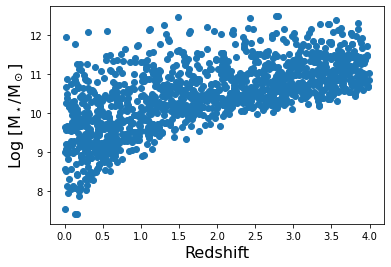

In [1]:
# Read in packages necessary for analysis
import numpy as np
from M2L import sample_sim
from astropy.cosmology import WMAP9 as cosmo
import pylab
import matplotlib.cm as cm

# Read in simulated data set
z,Mass,Merr,Lum = sample_sim()

# Plot the galaxy stellar mass against redshift in units of solar mass (M_\odot)
pylab.plot(z,Mass,'o')
pylab.xlabel('Redshift',fontsize=16)
pylab.ylabel(r'Log [M$_\star$/M$_\odot$]',fontsize=16)
pylab.show()

### Interesting...smaller galaxies with M$_\star <10^{10}$M$_\odot$ didn't exist at $z>1$

### Is this true, or might selection effects be skewing our M$_\star$ distribution?
To test whether select effects may have produced the above distribution, we can try and model our selection effects as follows:

$\bullet$ There is a known relation between galaxy stellar mass and galaxy luminosity (although with some scatter). This is known as the mass-to-light ratio.

$\bullet$ All instruments have a flux sensitivity limit for some given exposure time, and sources with flux below this sensitivity limited cannot be detected

$\bullet$ Although the flux sensitivity limit is a constant, the flux from a source of the same given luminosity decreases with distance squared. A constant flux limit thus translates to an evolving luminosity limit that increases with redshift (i.e. the luminosity threshold below which sources are no longer detectable increases with redshift)

The above data set was simulated assuming a flux sensitivity limit of $10^{-16}$ erg/cm$^2$/s. Given this flux sensitivity limit, we can then calculate the corresponding luminosity limit for the redshift distribution of the above sample. For different mass-to-light ratios, the calculated luminosity limit will translate to a different, redshift-dependent mass limit. In the code below I therefore plot what this stellar mass limit would be for a few different mass-to-light ratios (M/L) to see whether any of the resulting, modelled mass limits describe well the lower mass range distribution of our sample.

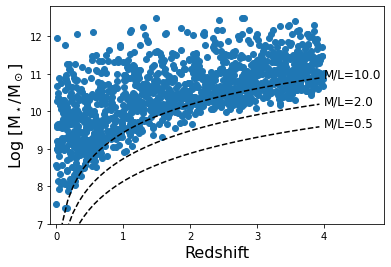

In [2]:
# Plot data, as above
pylab.plot(z,Mass,'o')

# Instrument flux sensitivy limit
flux_limit = 10.**-16 # erg/cm2/s

# Create an array of 4/0.08=50 dummy redshift values, going up from z=0.01 in intervals of 0.08, up to z=4
zrange = np.arange(0.01,4,0.08)

# Calculate the corresponding luminosity distance, Dl, in cm for each dummy redshift in our array
Mpc=3.086e24 # cm2
Dl = cosmo.luminosity_distance(zrange).value * Mpc

# Model the corresponding mass sensitivity limit at each redshift in the zrange array created above,
# given the above instument flux limit, and assuming three different mass-to-light ratios M/L = 2,5,10
for M2L in [0.5, 2, 10]:
    # Calculate luminosity sensitivy limit at luminosity distance Dl
    Llimit = 4. * np.pi * Dl**2 * flux_limit
    # Calculate corresponding stellar mass limit, converting to units of solar mass, Msol
    Msol = 1.998e33 # units of grams
    Mlimit = np.log10(Llimit * M2L/Msol) # In log10
    
    # Plot modelled mass sensitivity limit for some given M/L, M2L
    pylab.plot(zrange,Mlimit,c='k',ls='--')
    pylab.text(4,(Mlimit[-1]),"M/L=%.1f"%M2L,fontsize=12) # Plot label on plot

# Set plot parameters, and axis titles
pylab.xlim(-0.1,4.9)
pylab.ylim(7,12.8)
pylab.xlabel('Redshift',fontsize=16)
pylab.ylabel(r'Log [M$_\star$/M$_\odot$]',fontsize=16)
pylab.show()

### The stellar mass limits expected from an average galaxy mass-to-light ratio of M/L=2 seems to explain the observed, lower mass range of galaxies at increasing redshift very well

# Measuring the mass-to-light ratio
Let's now assume that I also have the luminosities for my galaxy sample, and I now want to verify whether mass and luminosity are correlated, and what the relation between the two parameters is.

Text(0, 0.5, 'Log [M$_\\star$/M$_\\odot$]')

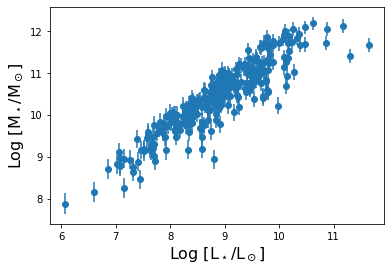

In [3]:
# Simulate a new stellar mass and lumiosity data set containing 100 data points
z,Mass,Merr,Lum = sample_sim(n=100)

# Plot stellar mass against luminosity
pylab.errorbar(Lum,Mass,yerr=Merr,fmt='o')
pylab.xlabel(r'Log [L$_\star$/L$_\odot$]',fontsize=16)
pylab.ylabel(r'Log [M$_\star$/M$_\odot$]',fontsize=16)

**The data appear to have a linear relation. Let's find the line of best-fit using curve_fit (see Chapter3_ModellingToolbox notebook)**

In [4]:
# Some necessary modules to read in sample parameters from a file... 
from CompSample import linfit
from scipy.optimize import curve_fit

# Let's try a linear fit to the data (my linfit function definition has been imported from CompSample.py)
popt,pcov = curve_fit(linfit,Lum,Mass,p0=[10])

a = popt[0]
aerr = np.sqrt(pcov[0][0])

print('\033[1m' + "Linear fit has best-fit parameter:\n\tM/L = %.3f +/- %.3f\n" % (a,aerr) + '\033[0m')

Linear fit has best-fit parameter:
	M/L = 1.171 +/- 0.003



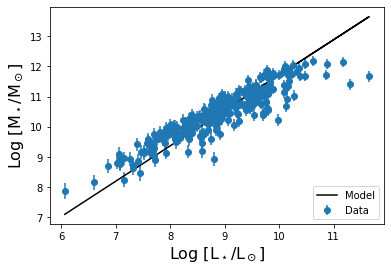

In [5]:
# Let's see how the fit looks

# Plot data points...
pylab.errorbar(Lum,Mass,yerr=Merr,fmt='o',label='Data')
pylab.xlabel(r'Log [L$_\star$/L$_\odot$]',fontsize=16)
pylab.ylabel(r'Log [M$_\star$/M$_\odot$]',fontsize=16)

# ..along with best-fit linear fit
pylab.plot(Lum, linfit(Lum,a),c='k',zorder=2,label='Model')
pylab.legend(loc=4)

## Residuals in our fit
A very useful way of checking the validy of a model is to look at the residuals, which corresponds to the ratio of the data over the model. A perfect model would give residuals of 1.

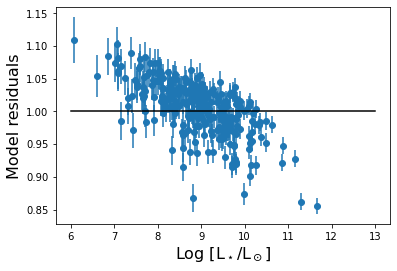

In [6]:
# Let's check the residuals on the modelled mass-luminosity relation
pylab.xlabel(r'Log [L$_\star$/L$_\odot$]',fontsize=16)
pylab.ylabel('Model residuals',fontsize=16)
pylab.errorbar(Lum, Mass/linfit(Lum,a), Merr/linfit(Lum,a),fmt='o',zorder=1)
pylab.plot([6,13], [1.0,1.0],c='k',zorder=2)

**The model underestimates M$_\star$ at low L$_\star$, but overestimate M$_\star$ at high L$_\star$**

## Confidence intervals and outliers
### 2D sample distributions
The residuals shown above imply that a single mass-to-light ratio does not provide a good description of the properties present in our data set. Presumably there is a range of mass-to-light ratios. 

Let's now consider whether there are any outliers in our distribution of data points, which may indicate galaxies with especially large or low mass-to-light ratios.

In [15]:
len(Lum)

274

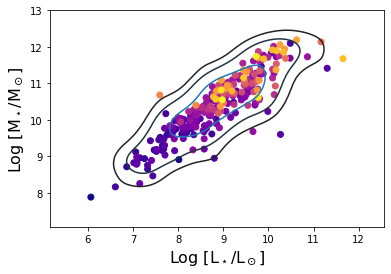

In [18]:
# Import package necessary to determine distribution of data points
# and to be able to colour-code by number density
from CompSample import conflevels, density_scatter
import seaborn as sns
import pandas as pd

# Let's fine regions in M-L parameter space containig 68%, 90% and 95% of the sample
# Note the nbins argument. This sets the number of bins in the M-L parameter space used
# to determine the location of the contours. If we only have 20 data points, nbins=10
# would be too large, since it would only give us 2 data points. Similarly, if we have
# 1000 data points, nbins=10 may be too small
levels = conflevels(Lum,Mass,nbins=10,confints=[0.99,0.90,0.68])

# Let's set the colours of each data point according to the number density at M-L
# Similar considerations apply here in the choice of values used in the bins argument
# This time the bins can have different dx and dy lengths
dencol=density_scatter(Lum, Mass, bins = [30,30])

# Need to store the Stellar mass and lumninosty values as a 'pandas DataFrame'
MLdata = {'Luminosity':Lum,'Stellar Mass':Mass}
df = pd.DataFrame(MLdata,columns=['Luminosity','Stellar Mass'])

# Plot the data points, colour coded according to number density
pylab.scatter(Lum, Mass, c=dencol,cmap=cm.plasma) # c=dencal argument sets colour-coding according to number density
pylab.xlabel(r'Log [L$_\star$/L$_\odot$]',fontsize=16)
pylab.ylabel(r'Log [M$_\star$/M$_\odot$]',fontsize=16)
# This command plots the contours containing 68%, 90% and 95% or the sample
sns.kdeplot(data=df,n_levels=levels)

In [14]:
levels

[0.03028525730918558, 0.060570514617324475, 0.16656891519790398]

**The contour regions define our outliers. Any data points that lie outside e.g. the contour containing 95% of the population are inconsistent with the rest of the sample at 2sigma**

### Outliers to best-fit models
Above I show how you can see what data points lie outside the parameter space occupied by the majority of the sample, with no consideration for an underlying model.

Let's not consider outliers in terms of some best-fit model

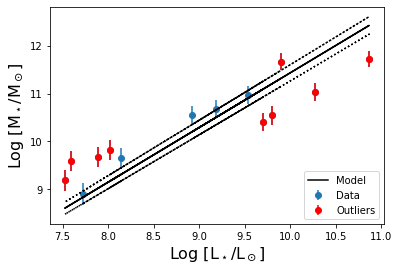

In [8]:
# Let's first consider a smaller sample
# I now select only every 20th data point in my stellar mass, luminosty sample
Lumsub = Lum[1::20]
Masssub = Mass[1::20]
Merrsub = Merr[1::20]

# We again fit the data using a linear fit
# Note, this time I am taking into account the uncertainties on stellar mass in my fit
# This is done by setting the sigma argument to your array of x-axis uncertainties
# and absolute_sigma=True
popt,pcov = curve_fit(linfit,Lumsub,Masssub,sigma=Merrsub,absolute_sigma=True)
a = popt[0]
aerr = np.sqrt(pcov[0][0])

# Correspondingly, this time also plot the model including the model uncertainties
# Firt plot the data
pylab.errorbar(Lumsub, Masssub,yerr=Merrsub,fmt='o',zorder=1,label='Data')
pylab.xlabel(r'Log [L$_\star$/L$_\odot$]',fontsize=16)
pylab.ylabel(r'Log [M$_\star$/M$_\odot$]',fontsize=16)
# And then plot the best-fit model
pylab.plot(Lumsub, linfit(Lumsub,a),c='k',zorder=2,label='Model')
# Also plot the 3sigma upper and lower bound on the best-fit model
pylab.plot(Lumsub, linfit(Lumsub,a+(3*aerr)),c='k',ls='dotted',zorder=2)
pylab.plot(Lumsub, linfit(Lumsub,a-(3*aerr)),c='k',ls='dotted',zorder=2)

# Find what the ratio is between the upper bound of your data point (i.e. considering 1sigma uncertainty)
# and the 3-sigma lower bound set by your model
lo_outliers = ((Masssub+Merrsub)/linfit(Lumsub,a-(3*aerr)))
# Similarly, for the lower bound of the data points and upper bound of the model
hi_outliers = ((Masssub-Merrsub)/linfit(Lumsub,a+(3*aerr)))

# Identify those data points that lie outside the 3 sigma uncertainty region
sel = (lo_outliers<1) | (hi_outliers>1)
# And plot these outliers in red
pylab.errorbar(Lumsub[sel], Masssub[sel],yerr=Merrsub[sel],fmt='or',zorder=3,label='Outliers')
pylab.legend(loc=4)

**Note that the above figure highlights in red those galaxies that lie outside the best-fit model 99.7% confidence region, including the 1sigma uncertainties. However, many of the red data points are $<3\sigma$ away from this 99.7% confidence region.**

# Testing the significance of a correlation; the rank correlation

We have now explored how we might try and quantify the relation between two variables; in the case above we found that galaxy stellar mass and luminosity are positively correlated. However, it is also important to be able to quantify how significant this relation is, rather than just eye-balling it.

To test this, we can use rank correlations to test the signifance of the relation between two parameters. 

## Non-parametric correlation tests
A rank correlation coefficient measures the degree of similarity between two rankings, and can be used to assess the significance of the relation between them without assuming some parameterised relation.

Two popular rank correlation statistics are the **Spearman's $\rho$** and **Kendall's $\tau$ rank tests**. An increasing rank correlation coefficient ($\rho$ or $\tau$) implies increasing agreement between rankings, where coefficients lie inside the interval [-1,1] where:

1: the agreement between the two rankings is perfect

0: the rankings are completely independent

-1: the disagreement between the two rankings is perfect, so they are inversely related. 

In addition to providing a rank, a 'p-value' is also important, which provides the probability of finding a similar rank value given the null hypothesis that the two sets of parameters are uncorrelated. Therefore, low values of the p-value imply that the correlation rank is significant. We will discuss this in more detail below.

## Parametric correlation tests
Parametric correlation tests asses the linear relations between two parameters. A commonly used parametric correlation test is the **Pearson's test**, which measures the linear correlation between two variables X and Y.

Similar to the Spearman's rank correlation coefficient, the Pearson's correlation coefficient, $r$, can have a value between -1 and 1, where -1 is total negative linear correlation, 0 is no linear correlation, and 1 is total positive linear correlation.

**Let's see how significant our luminosity-mass relation is, but first lets randomize our data a bit to make any correlation less obvious**

Text(0, 0.5, 'Log [M$_\\star$/M$_\\odot$]')

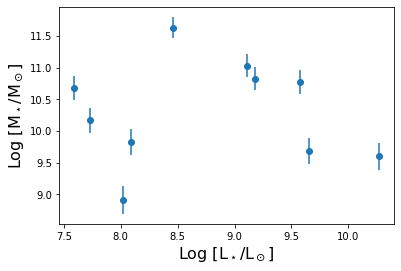

In [9]:
# Import package to randomize array
import random

# Select subsample..
randomLum = Lum[1::30]
randomMass = Mass[1::30]
randomMerr = Merr[1::30]
# ..and randomize the Luminosity values
random.shuffle(randomLum)

# Plot the data distribution
pylab.errorbar(randomLum, randomMass,yerr=randomMerr,fmt='o')
pylab.xlabel(r'Log [L$_\star$/L$_\odot$]',fontsize=16)
pylab.ylabel(r'Log [M$_\star$/M$_\odot$]',fontsize=16)

In [10]:
# Let's use the Spearman's rank test to assess the significance of our correlation

# First we import the necessary module
from scipy.stats import spearmanr

# Now let's calculate the spearman rank correficient
rank,sp_pvalue = spearmanr(randomLum,randomMass)

print('\033[1m' + "Luminosity and stellar mass have a Spearman's rank %.2f and p-value of %.2e" % (rank,sp_pvalue) + '\033[0m')

print('\n(I.e. there is %.1f%% probability that the Speaman rank is %.2f given the null hypothesis)' % (sp_pvalue*100,rank))

Luminosity and stellar mass have a Spearman's rank -0.05 and p-value of 8.81e-01

(I.e. there is 88.1% probability that the Speaman rank is -0.05 given the null hypothesis)


### Interpretation of rank value and the p-value
In statistics, the null hypothesis is the hypothesis that there is nothing new or special between two samples. For example, that there is no association among groups, or no relationship between two measured phenomena. In the case of correlation tests, the null hypothesis is thus the premis that the two samples are not correlated. The p-value provides the probability of getting the measured correlation coefficent, given the null hypothesis.

In our test above, we measured some rank value with an associated p-value. The rank value alone tells us something about how correlated stellar mass and luminosity are, but the p-value then tells us whether we can believe this rank test. Small p-values, tell us that there is a small chance of measuring the rank value that we measured if stellar mass and luminosity are *not* correlated. Conversely, large p-values tell us that there is a high chance or probability of getting the rank value that we measured if the two comparison samples are not correlated. So if we measure a rank=0.9, which would be indicative of a strong positive correlation, but the p-value was 0.6, that would indicate that there is a high probability (60% chance) of measuring rank=0.9 even where the two parameters are not correlated. We therefore would consider the mesaured high positive correlation as significant.

### When to reject the null hypothesis
Let's consider two data sets corresponding to completely independent and thus uncorrelated parameters. If we took multiple draws from these data sets and performed a rank correlation test for each draw, we would measure a distribution of rank values, a some small fraction of which may indicate that the data are correlated. The distribution of these rank values enable us to determine what the probability is of obtainining any given rank value when the data are not correlated (i.e. the null hypothesis). For example, let's assume we re-ran the rank correlation test and obtain a rank value $\rho_1$. If our previously derived distribution of rank coefficients show that 3% have a value $\rho>\rho_1$, our measured rank value of $\rho_1$ then has an associated p-value of 0.03.

The distribution of rank values given the null hypothesis will depend on the number of data points used in the correlation tests. The larger the number of data points, the lower the probability of producing a correlation by chance, or conversely, of removoing any signs of a correlation, when in fact there is one. It is fairly common to use 5% as the threshold probability below which we 'reject' the null hypothesis. I.e. if we measure some rank value with a p-value<0.05, it is then standard to reject the null hypothesis that the two parameters compared are *not* correlated.

This of course still means that there is up to 5% chance that you'll get the correlation coefficient that you measured, even when the parameters are not correlated. For example, see 'Spurious Correlations' (www.tylervigen.com/spurious-correlations ).

In [11]:
# Now let's see how the Pearon's correlation test compares
from scipy.stats import pearsonr
PCC,PCC_pvalue = pearsonr(randomLum,randomMass)

print('\033[1m' + "Luminosity and stellar mass have a Pearson's correlation coefficient %.2f and p-value of %.2e" % (PCC,PCC_pvalue) + '\033[0m')

print('\n(I.e. there is %.1f%% probability that the Speaman rank is %.2f given the null hypothesis)' % (PCC_pvalue*100,PCC))

Luminosity and stellar mass have a Pearson's correlation coefficient -0.02 and p-value of 9.65e-01

(I.e. there is 96.5% probability that the Speaman rank is -0.02 given the null hypothesis)


### Your turn
Try measuring the correlation coefficients and corresponding p-values for the full sample of stellar masses and luminosities simulated above (i.e. the Mass and Lumin arrays)

# Different populations of galaxies and selection effects
It is important to investigate the apparent difference in the regions of the mass-luminosity relation occupied by galaxies selected in different ways using statistical methods. In this context, an important question to ask is whether the two galaxy samples are consistent or not with arising from the same parent population. For example, do the properties of exoplanets found by detected transits consistent with some other sample of exoplanets that are detecting using a different method? If not, then you need to consider whether this is because they really do represent two different subsamples of explanets, or due to selection effects.

## The Kolmogorov-Smirnov test
One way of tackling this question is using the Kolmogorov–Smirnov (KS) test, which is a non-parametric test that measures the similarity between the cumulative probability distribution of a data sample and a reference probability distribution (one-sample KS test), or two data samples (two-sample K–S test). In our case, we want to apply the two-sample KS test to make a quantative statement on whether our smaller and randomised mass-luminosity sample, and the larger simulated sample is consistent with being selected from the same parent population.

The KS statistic quantifies a distance between the cumulative distribution function of the two samples being compared. This is illustrated in the figure below, where the KS statitic, $D$, corresponds to the maxmum distance between the two cumulative probability distribution functions indicated by the black arrow.

<img src="misc/KS2_Example.png" style="width: 300px;"/>

**Fig. 1.** *Illustration of the two-sample Kolmogorov–Smirnov statistic. Red and blue lines each correspond to an empirical distribution function, and the black arrow is the two-sample KS statistic (credit: Wikipedia)*.

The larger the value of $D$, the less likely that the two samples stem from the same parent population, and this is again quantified via the p-value. This is the probability of getting the difference $D$ given the null hypothesis that the two samples do not stem from the same parent population. Thus a small p-value indicates that the measured value of $D$ is very unlikely to arise given the null hypothesis, and we thus would believe that $D$ is representative of the different between the two samples. I.e. a larger, measured $D$ and small p-value would inidicate that the two samples are *inconsistent* with arising from the same parent population.

### Is my randomised sample of galaxy L-M pairs consistent with arising from the same parent population of a larger sample of galaxies?
Let's test this out by applying the KS test to the observed mass and luminosity distributions of our randomised sample, compared to the larger sample of simulated galaxies.

In [12]:
# Load in module needed to apply 2-D KS test
from scipy.stats import ks_2samp

# Apply KS test to the randomised luminosity distribution and a larger sample of galaxies
D, P = ks_2samp(randomLum,Lum)
print('\033[1m' + "The probability that D=%.2f given the null hypothesis is %.1f %% (i.e. the null hypothesis cannot be rejected)" % (D,P*100) + '\033[0m')

The probability that D=0.21 given the null hypothesis is 69.4 % (i.e. the null hypothesis cannot be rejected)


In [13]:
# Now lets compare the stellar mass distributions
D, P = ks_2samp(randomMass,Mass)
print('\033[1m' + "\nThe probability that D=%.2f given the null hypothesis is %.1f %% (i.e. the null hypothesis cannot be rejected)" % (D, P*100) + '\033[0m')


The probability that D=0.18 given the null hypothesis is 87.1 % (i.e. the null hypothesis cannot be rejected)


**Given that my subsample was taken from the larger sample of simulated mass-luminosity values, the KS test correctly finds that we cannot reject the hypothesis that the two samples are inconsistent with each other and originate from diferent, underlying, parent populations of galaxies.**

## Exoplanet properties and parameter dependencies
You should now be equipped with the statistical tools to compare your exoplanet with a larger sample of explanets, and thus place your exoplanet in the 'bigger context', and make some qualitative statements on the presence and significance of correlations and possible selection effecits. 

### Your turn
Given the parameters that you have measured for your exoplanet, what can you say about how it relates to the general population of exoplanets?

Maybe quantify the significance of any correlation between two exoplanet physical properties for a large sample of exoplanets, and use this to assess how consistent your exoplanet is with the larger population. Is your exoplanet an outlier in some parameter space, and is there any evidence of selection effects in the comparison sample of exoplanets?